In [1]:
from lightkurve import search_targetpixelfile

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pixelfile = search_targetpixelfile("KIC 8462852", quarter=16).download(quality_bitmask='hardest')

<Axes: title={'center': 'Target ID: 8462852, Cadence: 68385'}, xlabel='Pixel Column Number', ylabel='Pixel Row Number'>

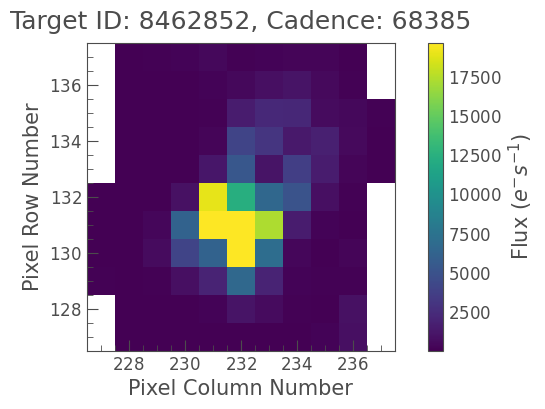

In [3]:
pixelfile.plot(frame=1000)

In [7]:
lc = pixelfile.to_lightcurve(aperture_mask='all')

In [8]:
lc.time, lc.flux

(<Time object: scale='tdb' format='bkjd' value=[1472.11777934 1472.13821223 1472.15864492 ... 1557.89718798 1557.9380561
  1557.95849016]>,
 <Quantity [258645.03, 258660.05, 258690.08, ..., 258929.86, 258884.66,
            258865.6 ] electron / s>)

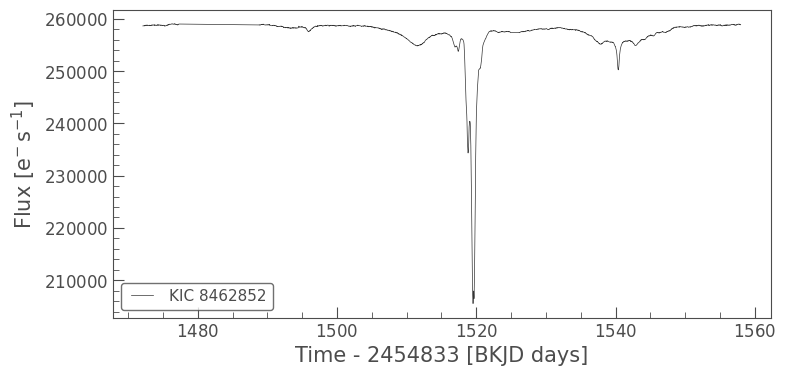

In [9]:
lc.plot()
import matplotlib.pyplot as plt
plt.show()

In [10]:
pixelFile = search_targetpixelfile('KIC 6922244', quarter=4).download()

c:\Users\tanil\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 4 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [11]:
lc = pixelFile.to_lightcurve(aperture_mask=pixelFile.pipeline_mask)

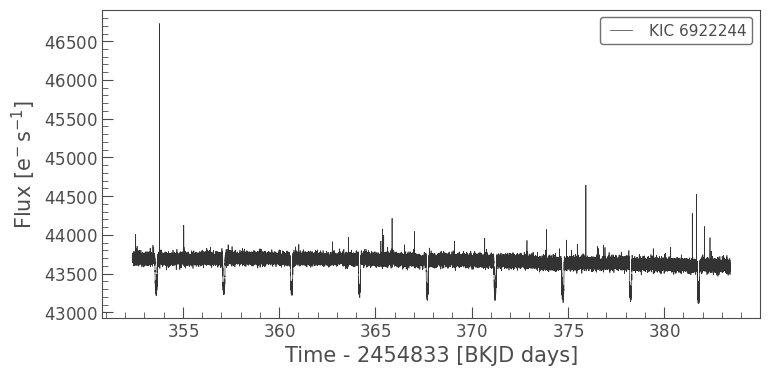

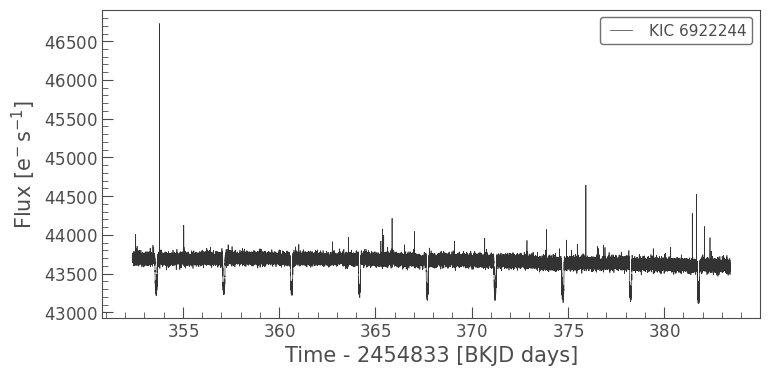

In [13]:
lc.plot()
plt.show()

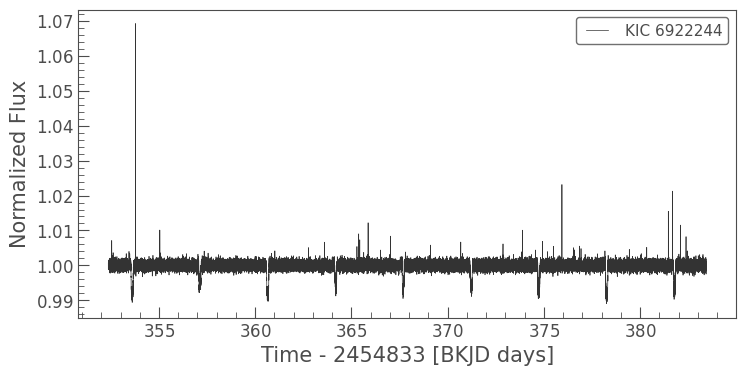

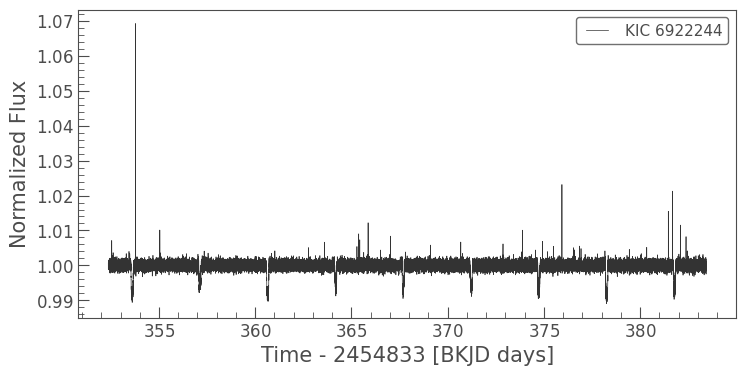

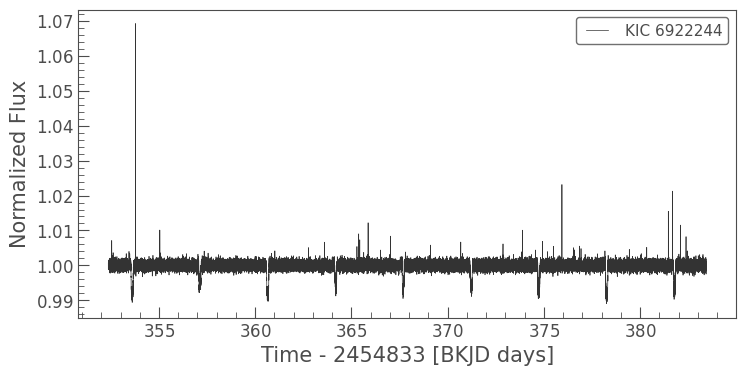

In [17]:
flat_lc = lc.flatten(window_length=401)
flat_lc.plot()
plt.show()

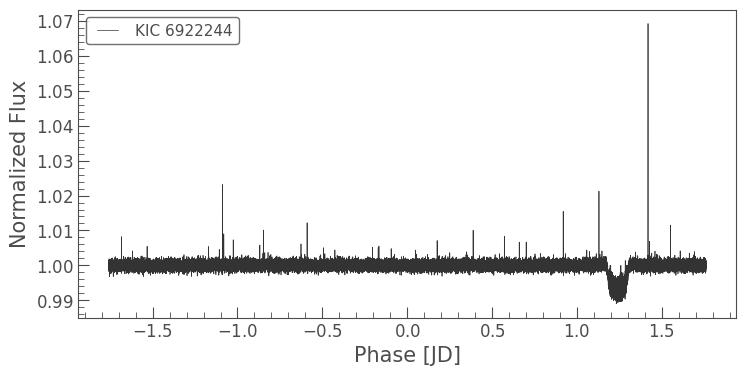

In [30]:
folded_lc = flat_lc.fold(period=3.522)
folded_lc.plot()
plt.show()

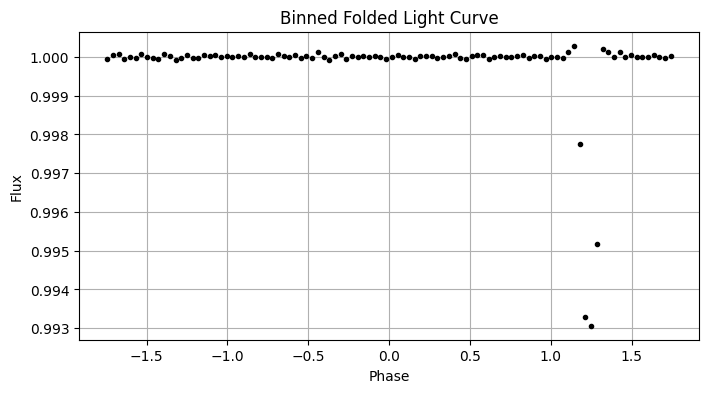

In [28]:
import numpy as np
import matplotlib.pyplot as plt

# Assume folded_lc is already created
phase = folded_lc.phase.value
flux = folded_lc.flux.value

# Set number of bins (e.g. 100)
num_bins = 100
bins = np.linspace(np.min(phase), np.max(phase), num_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Digitize and compute average flux in each bin
inds = np.digitize(phase, bins)
binned_flux = np.array([flux[inds == i].mean() if np.any(inds == i) else np.nan for i in range(1, len(bins))])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, binned_flux, 'ko', markersize=3)
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Binned Folded Light Curve")
plt.grid(True)
plt.show()

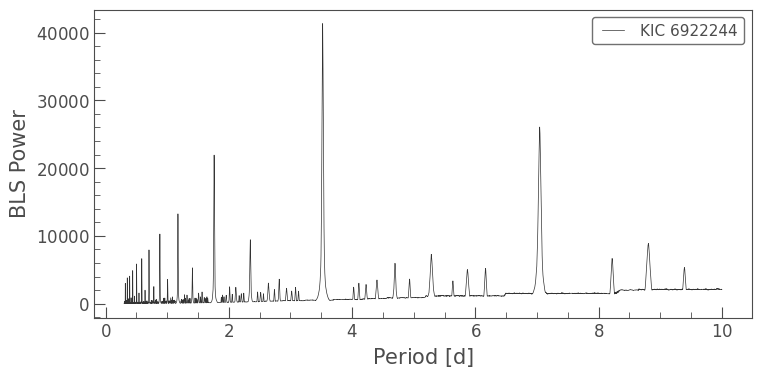

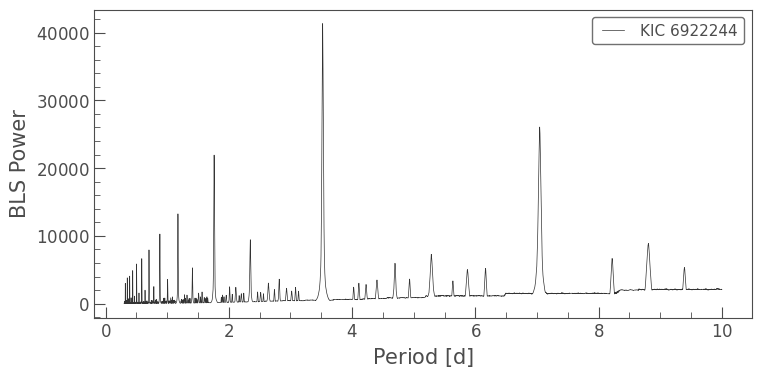

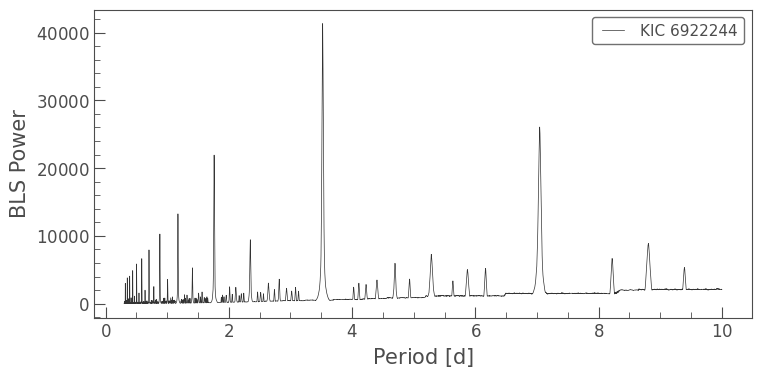

In [34]:
import numpy as np

periodogram = flat_lc.to_periodogram(
    method="bls",
    period=np.arange(0.3, 10, 0.001),
    duration=0.1  # Transit duration in days (adjust as needed)
)

periodogram.plot()
plt.show()

In [35]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.5f}'.format(best_fit_period))

Best fit period: 3.52200 d


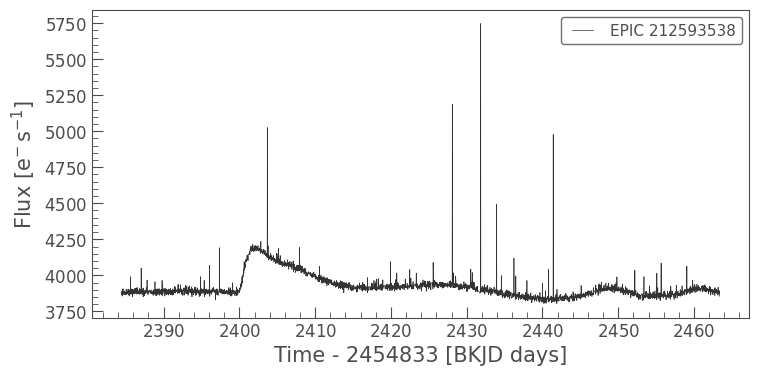

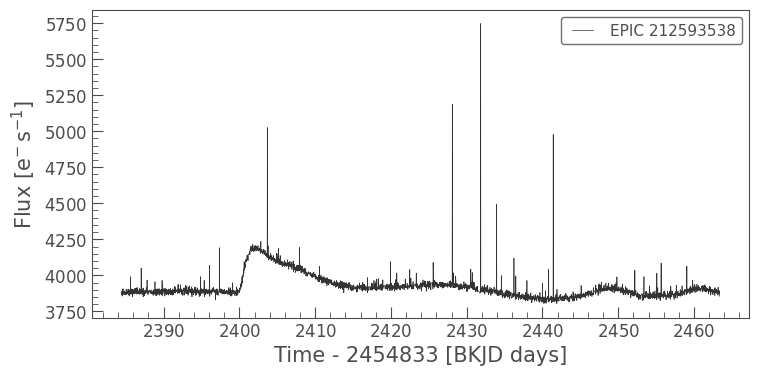

In [37]:
tpf = search_targetpixelfile('EPIC 212593538', campaign=6).download()
lc = tpf.to_lightcurve(aperture_mask='all')
lc.plot()
plt.show()

In [38]:
from lightkurve import search_targetpixelfile
search_result = lk.search_targetpixelfile('Pi Mensae', mission='TESS', sector=1)
tpf = search_result.download(quality_bitmask='default')

c:\Users\tanil\AppData\Local\Programs\Python\Python312\Lib\site-packages\lightkurve\search.py:420: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  warnings.warn(


In [39]:
tpf.mission
tpf.targetid

261136679

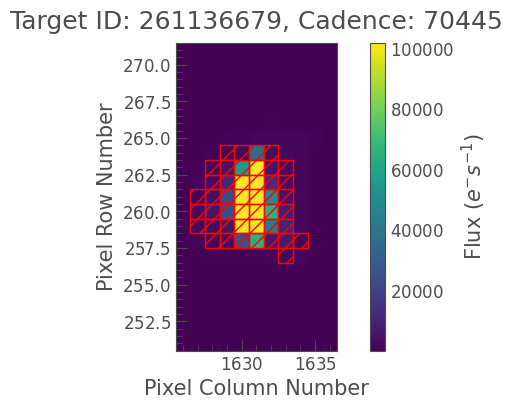

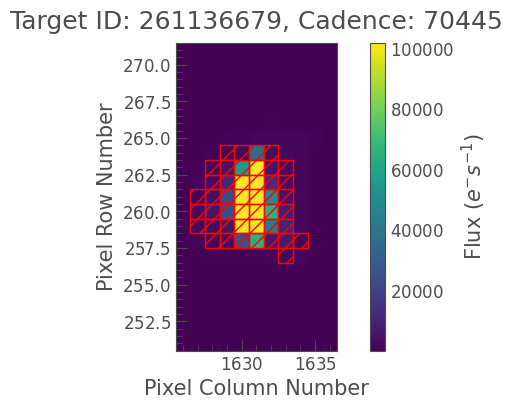

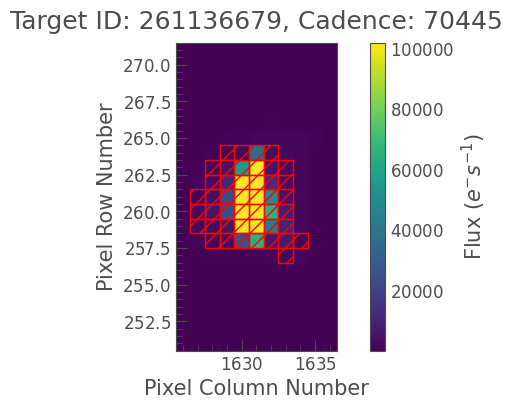

In [42]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

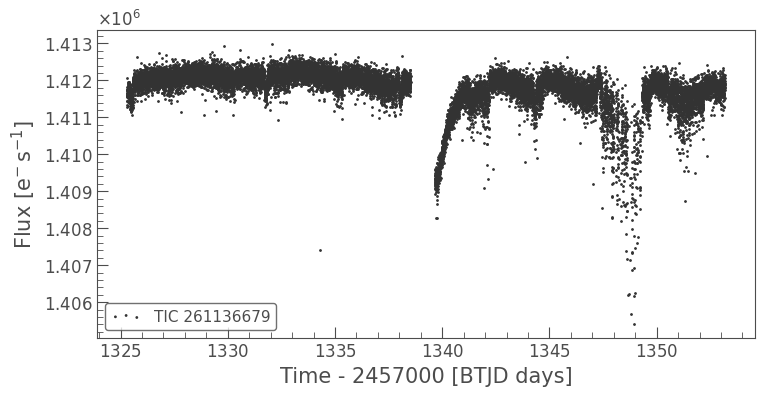

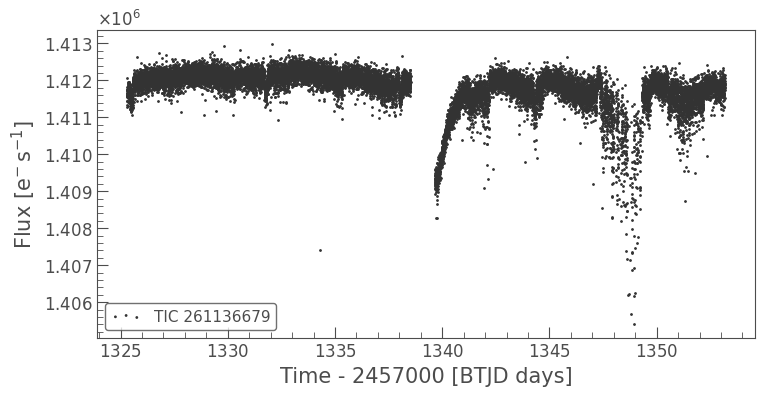

In [44]:
aperture_mask = tpf.create_threshold_mask(threshold=10)
lc = tpf.to_lightcurve(aperture_mask=aperture_mask)
lc.scatter()
plt.show()

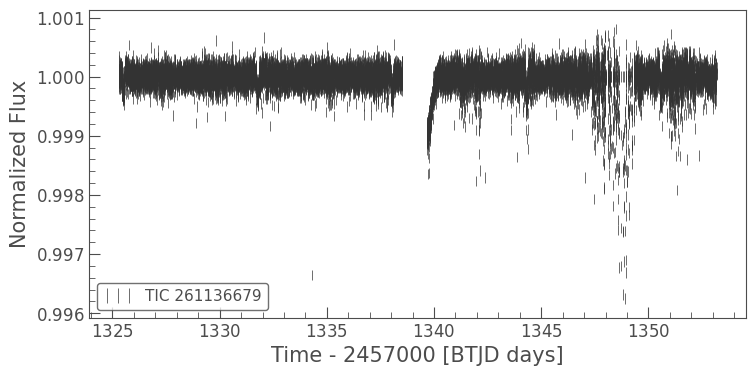

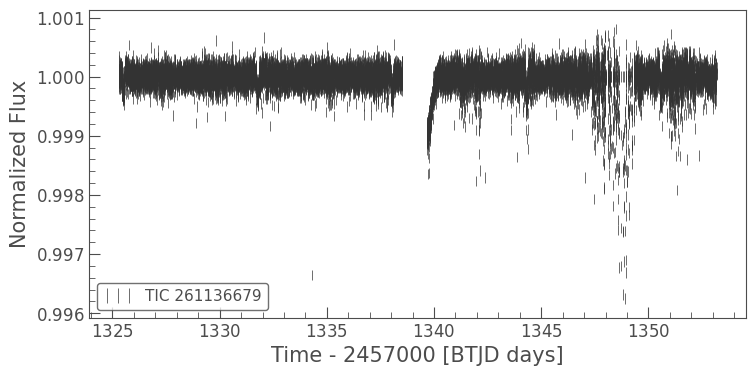

In [46]:
flat_lc = lc.flatten(window_length=1001)
flat_lc.errorbar()
plt.show()

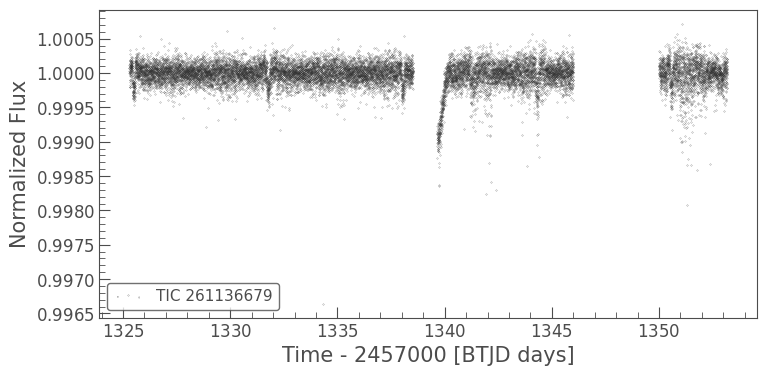

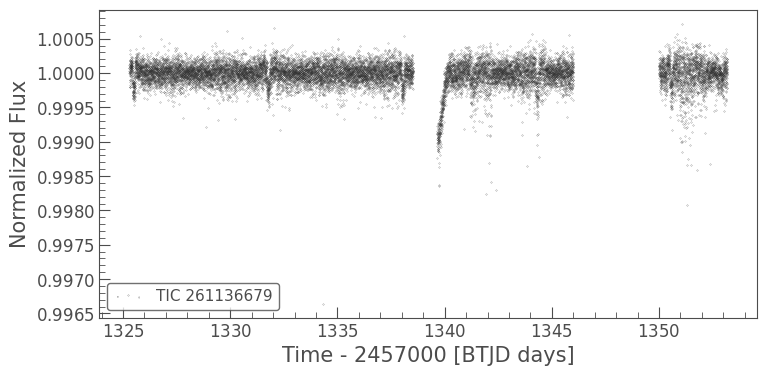

In [50]:
mask = (flat_lc.time.value < 1346) | (flat_lc.time.value > 1350)
masked_lc = flat_lc[mask]
masked_lc.scatter(s=0.1)
plt.show()

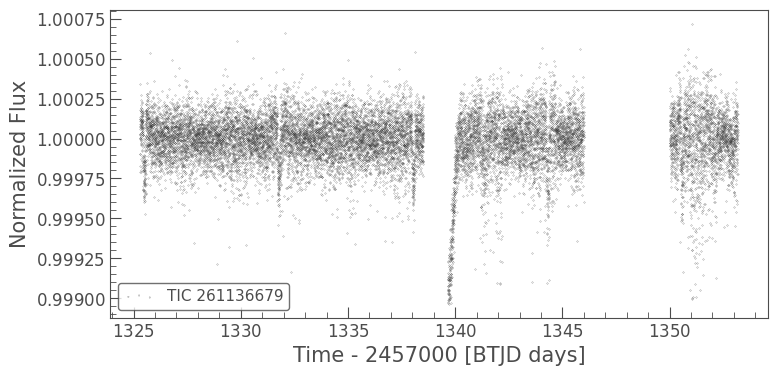

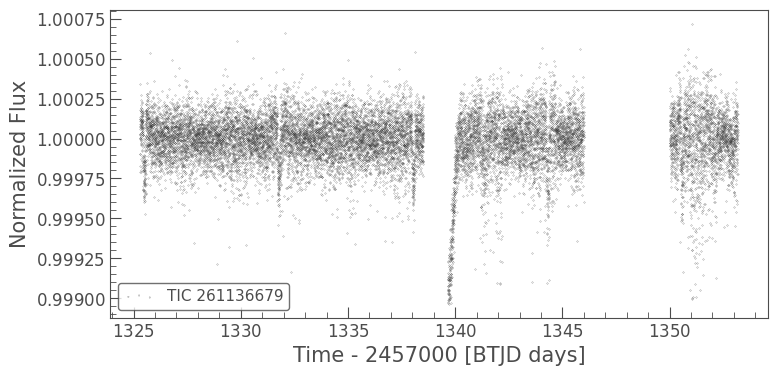

In [52]:
clipped_lc = masked_lc.remove_outliers(sigma=6)
clipped_lc.scatter(s=0.1)
plt.show()

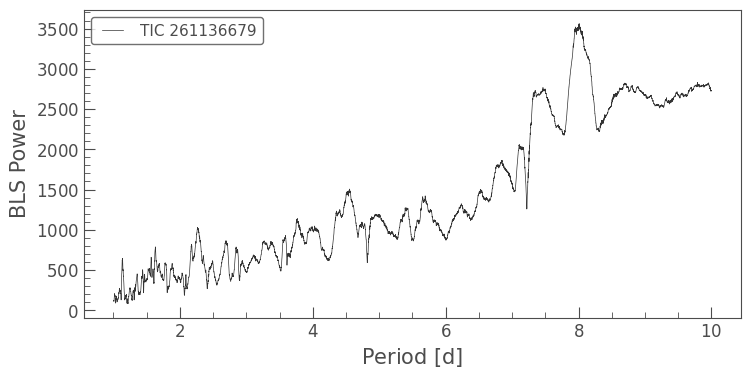

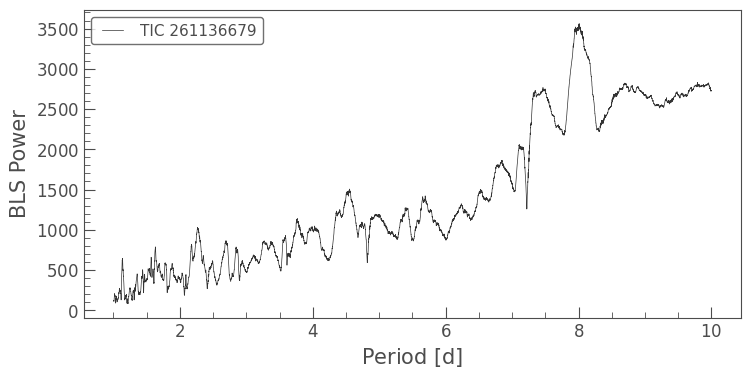

In [54]:
import numpy as np
periodogram = clipped_lc.to_periodogram(method="bls", period=np.arange(1, 10, 0.001))
periodogram.plot()
plt.show()

In [55]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 8.010 d


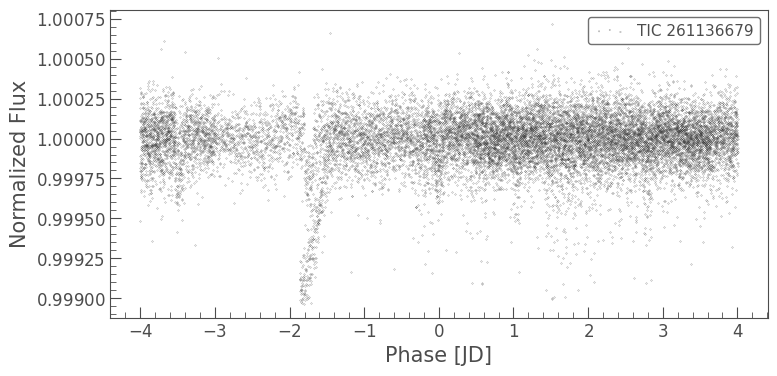

In [64]:
folded_lc = clipped_lc.fold(period=8.010, epoch_time=1325.504)
folded_lc.scatter(s=0.1)
plt.show()

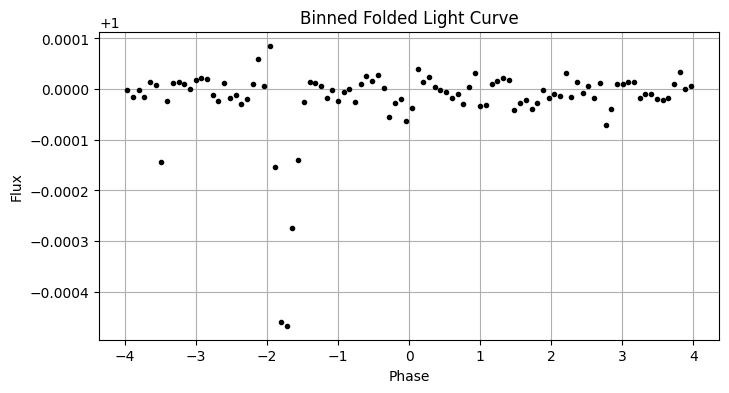

In [65]:
import numpy as np
import matplotlib.pyplot as plt

# Assume folded_lc is already created
phase = folded_lc.phase.value
flux = folded_lc.flux.value

# Set number of bins (e.g. 100)
num_bins = 100
bins = np.linspace(np.min(phase), np.max(phase), num_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Digitize and compute average flux in each bin
inds = np.digitize(phase, bins)
binned_flux = np.array([flux[inds == i].mean() if np.any(inds == i) else np.nan for i in range(1, len(bins))])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, binned_flux, 'ko', markersize=3)
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Binned Folded Light Curve")
plt.grid(True)
plt.show()

In [68]:
from lightkurve import TessTargetPixelFile
import lightkurve as lk
tpf = TessTargetPixelFile("C:/Users/tanil/Downloads/MAST_2025-10-04T1327/TESS/tess2025232030459-s0096-0000000419012256-0293-s/tess2025232030459-s0096-0000000419012256-0293-s_tp.fits")
tpf

TessTargetPixelFile(TICID: 419012256)

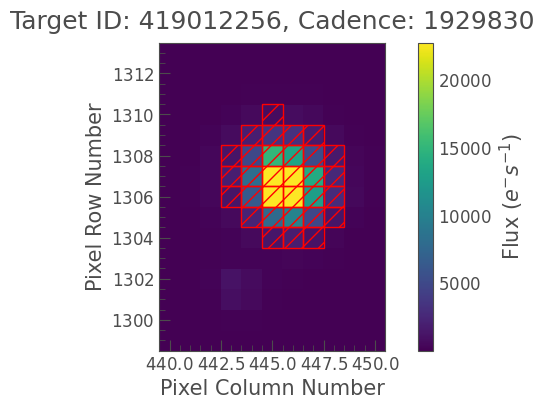

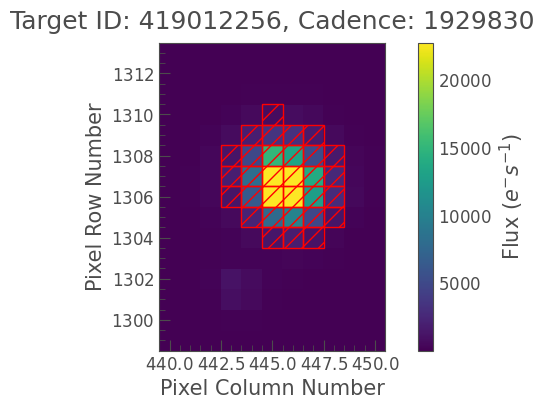

In [70]:
tpf.plot(aperture_mask=tpf.pipeline_mask)
plt.show()

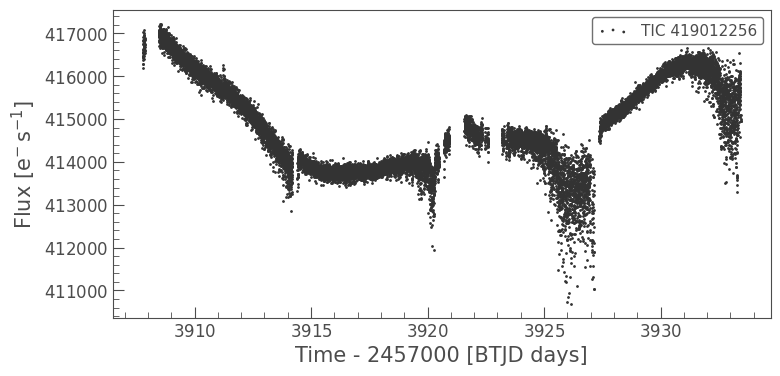

In [71]:
lc = tpf.to_lightcurve()
lc.scatter()
plt.show()

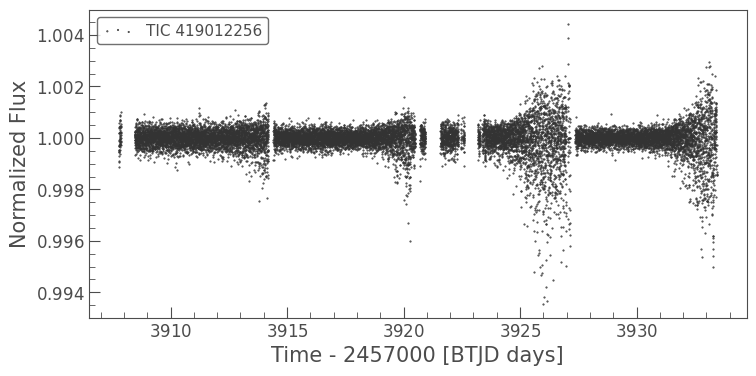

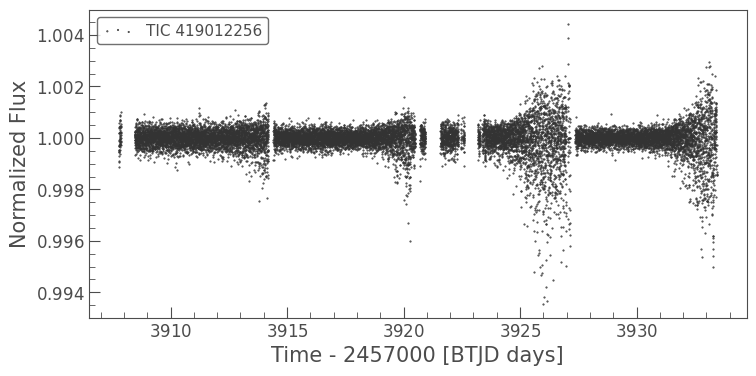

In [73]:
flat_lc = lc.flatten()
flat_lc.scatter(s=1)
plt.show()

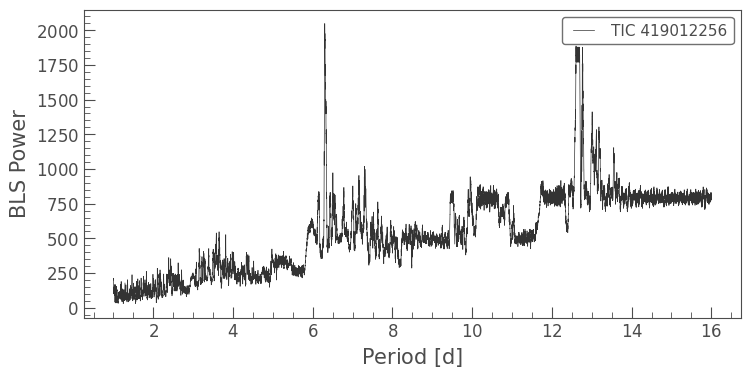

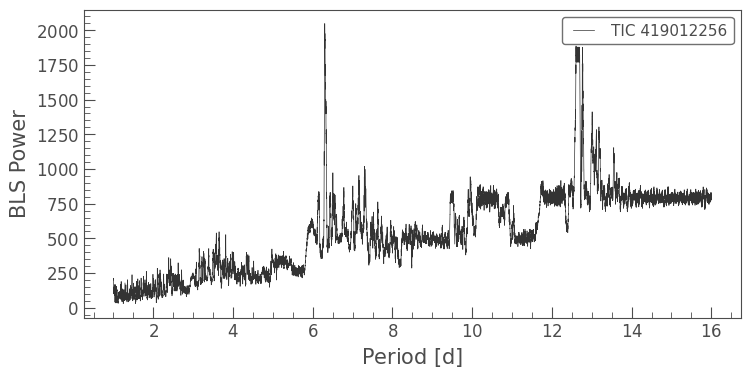

In [75]:
import numpy as np
periodogram = flat_lc.to_periodogram(method="bls", period=np.arange(1, 16, 0.001))
periodogram.plot()
plt.show()

In [76]:
best_fit_period = periodogram.period_at_max_power
print('Best fit period: {:.3f}'.format(best_fit_period))

Best fit period: 6.300 d


c:\Users\tanil\AppData\Local\Programs\Python\Python312\Lib\site-packages\astropy\utils\decorators.py:620: LightkurveDeprecationWarning: "t0" was deprecated in version 2.0 and will be removed in a future version. Use argument "epoch_time" instead.
  return function(*args, **kwargs)


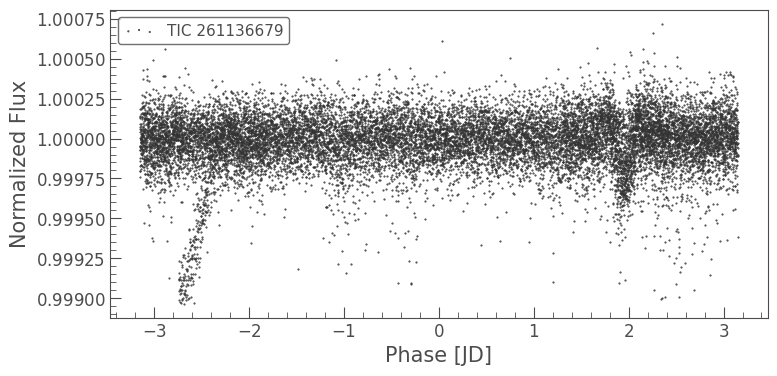

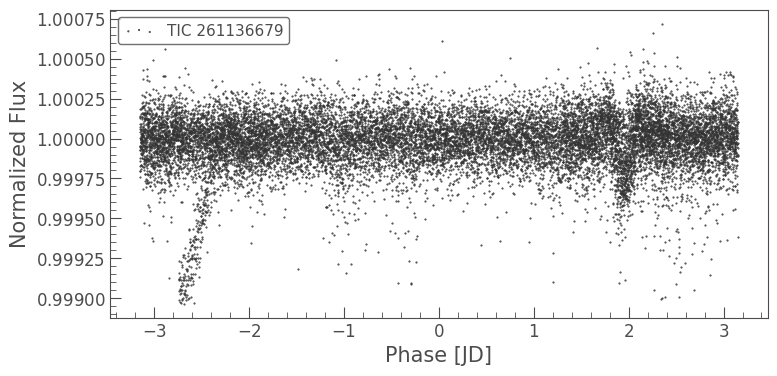

In [78]:
folded_lc = clipped_lc.fold(period=6.300, t0=1355)
folded_lc.scatter(s=1)
plt.show()

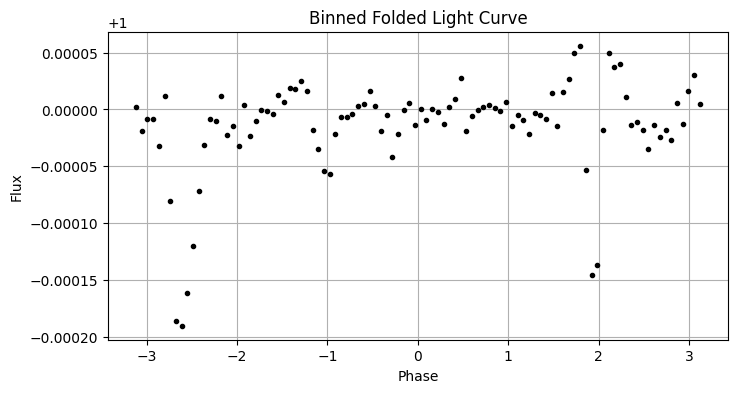

In [81]:
import numpy as np
import matplotlib.pyplot as plt

# Assume folded_lc is already created
phase = folded_lc.phase.value
flux = folded_lc.flux.value

# Set number of bins (e.g. 100)
num_bins = 100
bins = np.linspace(np.min(phase), np.max(phase), num_bins + 1)
bin_centers = 0.5 * (bins[1:] + bins[:-1])

# Digitize and compute average flux in each bin
inds = np.digitize(phase, bins)
binned_flux = np.array([flux[inds == i].mean() if np.any(inds == i) else np.nan for i in range(1, len(bins))])

# Plot
plt.figure(figsize=(8, 4))
plt.plot(bin_centers, binned_flux, 'ko', markersize=3)
plt.xlabel("Phase")
plt.ylabel("Flux")
plt.title("Binned Folded Light Curve")
plt.grid(True)
plt.show()

In [ ]:
# ax = in each cell with plt.show() to remove dual plots

folded_lc = clipped_lc.fold(period=8.010, epoch_time=1325.504)
ax = folded_lc.scatter(s=0.1)  # Assign to variable to suppress auto-render
plt.show()